In [59]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px

In [60]:
import plotly.graph_objects as go
from datetime import datetime

In [61]:
#convert date strings to proper dates, set date column as index column
tesla_df = pd.read_csv("TSLA.csv", parse_dates=True,index_col='Date')
tesla_df
#from this we know the rough shape of the data 

Open         High         Low        Close    Adj Close  \
Date                                                                         
2010-06-29     3.800000     5.000000    3.508000     4.778000     4.778000   
2010-06-30     5.158000     6.084000    4.660000     4.766000     4.766000   
2010-07-01     5.000000     5.184000    4.054000     4.392000     4.392000   
2010-07-02     4.600000     4.620000    3.742000     3.840000     3.840000   
2010-07-06     4.000000     4.000000    3.166000     3.222000     3.222000   
...                 ...          ...         ...          ...          ...   
2022-03-18   874.489990   907.849976  867.390015   905.390015   905.390015   
2022-03-21   914.979980   942.849976  907.090027   921.159973   921.159973   
2022-03-22   930.000000   997.859985  921.750000   993.979980   993.979980   
2022-03-23   979.940002  1040.699951  976.400024   999.109985   999.109985   
2022-03-24  1009.729980  1024.489990  988.799988  1013.919983  1013.919983   

              Volume  
Date                  
2010-06-29  93831500  
2010-06-30  85935500  
2010-07-01  41094000  
2010-07-02  25699000  
2010-07-06  34334500  
...              ...  
2022-03-18  33408500  
2022-03-21  27327200  
2022-03-22  35289500  
2022-03-23  40225400  
2022-03-24  22901900  

[2956 rows x 6 columns]

*DATA CLEANING*
1. Verify if data needs cleaning
2. Check data types, shape and statistics

In [62]:
tesla_df.shape

(2956, 6)

In [63]:
#use .info() to see if there's any null and what data type are in the columns
tesla_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2956 entries, 2010-06-29 to 2022-03-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2956 non-null   float64
 1   High       2956 non-null   float64
 2   Low        2956 non-null   float64
 3   Close      2956 non-null   float64
 4   Adj Close  2956 non-null   float64
 5   Volume     2956 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 161.7 KB


In [64]:
#check if there's any duplicates in the data
duplicates_sum = int(tesla_df.duplicated().sum())
duplicates_sum

0

In [65]:
#looking at the statistics of the data, perhaps will be useful for analysis
tesla_df.describe()

Open         High          Low        Close    Adj Close  \
count  2956.000000  2956.000000  2956.000000  2956.000000  2956.000000   
mean    138.691296   141.771603   135.425953   138.762183   138.762183   
std     250.044839   255.863239   243.774157   250.123115   250.123115   
min       3.228000     3.326000     2.996000     3.160000     3.160000   
25%      19.627000    20.402000    19.127500    19.615000    19.615000   
50%      46.656999    47.487001    45.820002    46.545000    46.545000   
75%      68.057001    69.357500    66.911501    68.103998    68.103998   
max    1234.410034  1243.489990  1217.000000  1229.910034  1229.910034   

             Volume  
count  2.956000e+03  
mean   3.131449e+07  
std    2.798383e+07  
min    5.925000e+05  
25%    1.310288e+07  
50%    2.488680e+07  
75%    3.973875e+07  
max    3.046940e+08

*Visualization*
1. Plotting data for inference of the stock
2. Plans to make candlestick chart if time allows

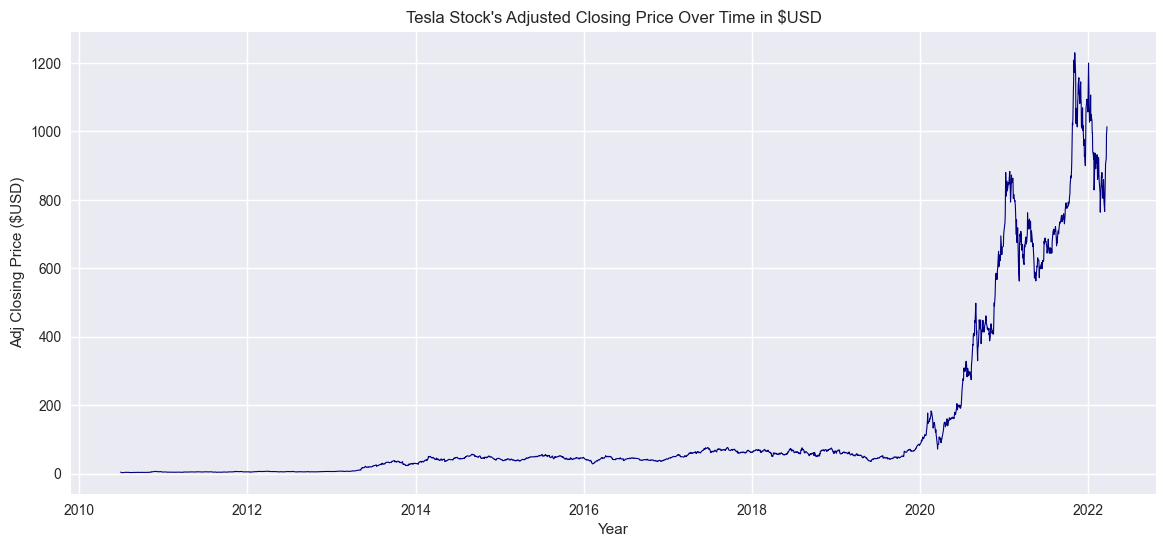

In [66]:
#plotting the adjusted price as they are made to represent historical stock information better.
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(14, 6))
plt.plot(tesla_df.index, tesla_df["Adj Close"], linestyle='-',lw=0.8, color='navy')
plt.xlabel("Year")
plt.ylabel("Adj Closing Price ($USD)")
plt.title("Tesla Stock's Adjusted Closing Price Over Time in $USD")
plt.show()

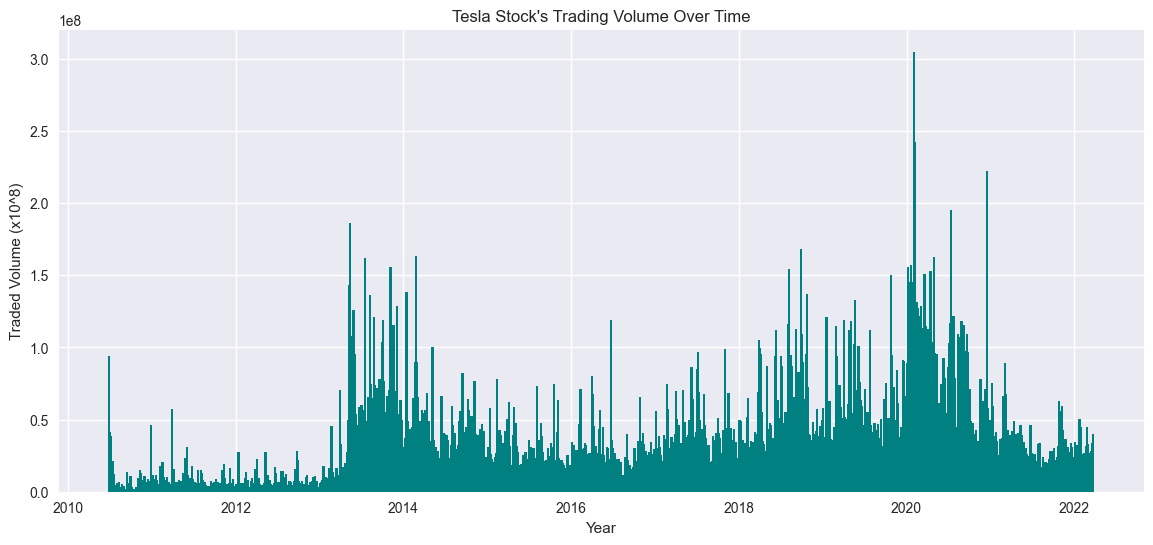

In [67]:
#graphing tesla trading volume. Using bar for easier visualization
plt.figure(figsize=(14, 6))
plt.bar(tesla_df.index, tesla_df["Volume"], color="teal", width=10)
#plt.plot(tesla_df.index, tesla_df["Volume"], linestyle='-',lw=0.8, color='teal')
plt.xlabel("Year")
plt.ylabel("Traded Volume (x10^8)")
plt.title("Tesla Stock's Trading Volume Over Time")
plt.show()

In [68]:
#Candlestick chart for Tesla

fig = go.Figure(data=[go.Candlestick(x=tesla_df.index,
                open=tesla_df["Open"],
                high=tesla_df["High"],
                low=tesla_df["Low"],
                close=tesla_df["Close"])])
fig.update_layout(width=1100, height=700, title_text= "Tesla Candlestick Chart Over Time")
fig.show()

In [69]:
#making a df that only goes up to 2020 so I can observe the trends before 2020 
#This is because the majority of the graph's highs come from after 2020, making it hard to see the trends beforehand
#the graph above has the majority of its highs 2020 and after, and I coul
tesla_df_filtered = tesla_df[tesla_df.index <= "2020-01-01"]
tesla_df_filtered 

Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2010-06-29   3.800000   5.000000   3.508000   4.778000   4.778000  93831500
2010-06-30   5.158000   6.084000   4.660000   4.766000   4.766000  85935500
2010-07-01   5.000000   5.184000   4.054000   4.392000   4.392000  41094000
2010-07-02   4.600000   4.620000   3.742000   3.840000   3.840000  25699000
2010-07-06   4.000000   4.000000   3.166000   3.222000   3.222000  34334500
...               ...        ...        ...        ...        ...       ...
2019-12-24  83.671997  85.094002  82.538002  85.050003  85.050003  40273500
2019-12-26  85.582001  86.695999  85.269997  86.188004  86.188004  53169500
2019-12-27  87.000000  87.061996  85.222000  86.075996  86.075996  49728500
2019-12-30  85.758003  85.800003  81.851997  82.940002  82.940002  62932000
2019-12-31  81.000000  84.258003  80.416000  83.666000  83.666000  51428500

[2394 rows x 6 columns]

In [70]:
#candle stick chart that goes up until 2020
fig = go.Figure(data=[go.Candlestick(x=tesla_df_filtered.index,
                open=tesla_df_filtered["Open"],
                high=tesla_df_filtered["High"],
                low=tesla_df_filtered["Low"],
                close=tesla_df_filtered["Close"])])
fig.update_layout(width=1100, height=700, title_text= "Tesla Candlestick Chart Up Until 2020")

fig.show()

In [71]:
#import the EV csv as a dataframe
EV_df = pd.read_csv("Electric_Vehicle_Population_Data.csv")
EV_df

VIN (1-10)     County         City State  Postal Code  Model Year  \
0       5YJSA1E65N     Yakima      Granger    WA      98932.0        2022   
1       KNDC3DLC5N     Yakima       Yakima    WA      98902.0        2022   
2       5YJYGDEEXL  Snohomish      Everett    WA      98208.0        2020   
3       3C3CFFGE1G     Yakima       Yakima    WA      98908.0        2016   
4       KNDCC3LD5K     Kitsap    Bremerton    WA      98312.0        2019   
...            ...        ...          ...   ...          ...         ...   
250654  7SAYGDEE7S   Franklin        Pasco    WA      99301.0        2025   
250655  2C4RC1L77J     Pierce       Tacoma    WA      98407.0        2018   
250656  7SAYGDEF6P     Pierce  Bonney Lake    WA      98391.0        2023   
250657  WBY8P6C54K       King      Seattle    WA      98117.0        2019   
250658  JTMAB3FV8P  Klickitat   Goldendale    WA      98620.0        2023   

            Make              Model                   Electric Vehicle Type  \
0          TESLA            MODEL S          Battery Electric Vehicle (BEV)   
1            KIA                EV6          Battery Electric Vehicle (BEV)   
2          TESLA            MODEL Y          Battery Electric Vehicle (BEV)   
3           FIAT                500          Battery Electric Vehicle (BEV)   
4            KIA               NIRO  Plug-in Hybrid Electric Vehicle (PHEV)   
...          ...                ...                                     ...   
250654     TESLA            MODEL Y          Battery Electric Vehicle (BEV)   
250655  CHRYSLER           PACIFICA  Plug-in Hybrid Electric Vehicle (PHEV)   
250656     TESLA            MODEL Y          Battery Electric Vehicle (BEV)   
250657       BMW                 I3          Battery Electric Vehicle (BEV)   
250658    TOYOTA  RAV4 PRIME (PHEV)  Plug-in Hybrid Electric Vehicle (PHEV)   

        Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0       Eligibility unknown as battery range has not b...             0.0   
1       Eligibility unknown as battery range has not b...             0.0   
2                 Clean Alternative Fuel Vehicle Eligible           291.0   
3                 Clean Alternative Fuel Vehicle Eligible            84.0   
4                   Not eligible due to low battery range            26.0   
...                                                   ...             ...   
250654  Eligibility unknown as battery range has not b...             0.0   
250655            Clean Alternative Fuel Vehicle Eligible            33.0   
250656  Eligibility unknown as battery range has not b...             0.0   
250657            Clean Alternative Fuel Vehicle Eligible           153.0   
250658            Clean Alternative Fuel Vehicle Eligible            42.0   

        Base MSRP  Legislative District  DOL Vehicle ID  \
0             0.0                  15.0       187279214   
1             0.0                  15.0       210098241   
2             0.0                  44.0       121781950   
3             0.0                  14.0       180778377   
4             0.0                  26.0         2581225   
...           ...                   ...             ...   
250654        0.0                   9.0       274986323   
250655        0.0                  27.0       128901748   
250656        0.0                  31.0       258537660   
250657        0.0                  36.0       477080334   
250658        0.0                  14.0       255440223   

                   Vehicle Location  \
0        POINT (-120.1871 46.33949)   
1       POINT (-120.52041 46.59751)   
2       POINT (-122.18637 47.89251)   
3       POINT (-120.60199 46.59817)   
4       POINT (-122.65223 47.57192)   
...                             ...   
250654  POINT (-119.09467 46.23542)   
250655  POINT (-122.51134 47.29238)   
250656  POINT (-122.17144 47.19175)   
250657  POINT (-122.38418 47.70044)   
250658    POINT (-120.82545 45.823)   

                               

In [72]:
#use .info() to see if there's any null and what data type are in the columns
EV_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250659 entries, 0 to 250658
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         250659 non-null  object 
 1   County                                             250653 non-null  object 
 2   City                                               250653 non-null  object 
 3   State                                              250659 non-null  object 
 4   Postal Code                                        250653 non-null  float64
 5   Model Year                                         250659 non-null  int64  
 6   Make                                               250659 non-null  object 
 7   Model                                              250659 non-null  object 
 8   Electric Vehicle Type                              250659 non-null  object

In [73]:
EV_df.shape

(250659, 17)

In [74]:
# Remove rows that contain model year before 2009 or after 2023, to match with the Tesla dataset I'm analyzing this with
years = EV_df["Model Year"]
i = EV_df[(years < 2009) | (years > 2023)].index
cleaned_df = EV_df.drop(i)
cleaned_df

VIN (1-10)     County         City State  Postal Code  Model Year  \
0       5YJSA1E65N     Yakima      Granger    WA      98932.0        2022   
1       KNDC3DLC5N     Yakima       Yakima    WA      98902.0        2022   
2       5YJYGDEEXL  Snohomish      Everett    WA      98208.0        2020   
3       3C3CFFGE1G     Yakima       Yakima    WA      98908.0        2016   
4       KNDCC3LD5K     Kitsap    Bremerton    WA      98312.0        2019   
...            ...        ...          ...   ...          ...         ...   
250652  1N4AZ0CP5D     Kitsap    Bremerton    WA      98310.0        2013   
250655  2C4RC1L77J     Pierce       Tacoma    WA      98407.0        2018   
250656  7SAYGDEF6P     Pierce  Bonney Lake    WA      98391.0        2023   
250657  WBY8P6C54K       King      Seattle    WA      98117.0        2019   
250658  JTMAB3FV8P  Klickitat   Goldendale    WA      98620.0        2023   

            Make              Model                   Electric Vehicle Type  \
0          TESLA            MODEL S          Battery Electric Vehicle (BEV)   
1            KIA                EV6          Battery Electric Vehicle (BEV)   
2          TESLA            MODEL Y          Battery Electric Vehicle (BEV)   
3           FIAT                500          Battery Electric Vehicle (BEV)   
4            KIA               NIRO  Plug-in Hybrid Electric Vehicle (PHEV)   
...          ...                ...                                     ...   
250652    NISSAN               LEAF          Battery Electric Vehicle (BEV)   
250655  CHRYSLER           PACIFICA  Plug-in Hybrid Electric Vehicle (PHEV)   
250656     TESLA            MODEL Y          Battery Electric Vehicle (BEV)   
250657       BMW                 I3          Battery Electric Vehicle (BEV)   
250658    TOYOTA  RAV4 PRIME (PHEV)  Plug-in Hybrid Electric Vehicle (PHEV)   

        Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0       Eligibility unknown as battery range has not b...             0.0   
1       Eligibility unknown as battery range has not b...             0.0   
2                 Clean Alternative Fuel Vehicle Eligible           291.0   
3                 Clean Alternative Fuel Vehicle Eligible            84.0   
4                   Not eligible due to low battery range            26.0   
...                                                   ...             ...   
250652            Clean Alternative Fuel Vehicle Eligible            75.0   
250655            Clean Alternative Fuel Vehicle Eligible            33.0   
250656  Eligibility unknown as battery range has not b...             0.0   
250657            Clean Alternative Fuel Vehicle Eligible           153.0   
250658            Clean Alternative Fuel Vehicle Eligible            42.0   

        Base MSRP  Legislative District  DOL Vehicle ID  \
0             0.0                  15.0       187279214   
1             0.0                  15.0       210098241   
2             0.0                  44.0       121781950   
3             0.0                  14.0       180778377   
4             0.0                  26.0         2581225   
...           ...                   ...             ...   
250652        0.0                  23.0       214384901   
250655        0.0                  27.0       128901748   
250656        0.0                  31.0       258537660   
250657        0.0                  36.0       477080334   
250658        0.0                  14.0       255440223   

                   Vehicle Location  \
0        POINT (-120.1871 46.33949)   
1       POINT (-120.52041 46.59751)   
2       POINT (-122.18637 47.89251)   
3       POINT (-120.60199 46.59817)   
4       POINT (-122.65223 47.57192)   
...                             ...   
250652   POINT (-122.61136 47.5752)   
250655  POINT (-122.51134 47.29238)   
250656  POINT (-122.17144 47.19175)   
250657  POINT (-122.38418 47.70044)   
250658    POINT (-120.82545 45.823)   

                               

In [75]:
#to visually check if the years are within 2009 and 2023
sorted_year = cleaned_df.sort_values("Model Year",ascending = True)
sorted_year

VIN (1-10)     County                      City State  Postal Code  \
44414   5YJRE1A10A       King                   Seattle    WA      98102.0   
246888  5YJRE1A32A     Island                  Freeland    WA      98249.0   
63410   1W9WL21B6A   Thurston                   Olympia    WA      98501.0   
17752   5YJRE1A1XA       King                  Bellevue    WA      98006.0   
244682  5YJRE1A32A     Pierce                Steilacoom    WA      98388.0   
...            ...        ...                       ...   ...          ...   
60802   1N4AZ1BV7P       King               Federal Way    WA      98001.0   
19      7FCTGAAA3P     Kitsap                   Seabeck    WA      98380.0   
250658  JTMAB3FV8P  Klickitat                Goldendale    WA      98620.0   
250650  5YJ3E1EA5P     Pierce  Joint Base Lewis Mcchord    WA      98433.0   
250656  7SAYGDEF6P     Pierce               Bonney Lake    WA      98391.0   

        Model Year                  Make              Model  \
44414         2010                 TESLA           ROADSTER   
246888        2010                 TESLA           ROADSTER   
63410         2010  WHEEGO ELECTRIC CARS             WHEEGO   
17752         2010                 TESLA           ROADSTER   
244682        2010                 TESLA           ROADSTER   
...            ...                   ...                ...   
60802         2023                NISSAN               LEAF   
19            2023                RIVIAN                R1T   
250658        2023                TOYOTA  RAV4 PRIME (PHEV)   
250650        2023                 TESLA            MODEL 3   
250656        2023                 TESLA            MODEL Y   

                         Electric Vehicle Type  \
44414           Battery Electric Vehicle (BEV)   
246888          Battery Electric Vehicle (BEV)   
63410   Plug-in Hybrid Electric Vehicle (PHEV)   
17752           Battery Electric Vehicle (BEV)   
244682          Battery Electric Vehicle (BEV)   
...                                        ...   
60802           Battery Electric Vehicle (BEV)   
19              Battery Electric Vehicle (BEV)   
250658  Plug-in Hybrid Electric Vehicle (PHEV)   
250650          Battery Electric Vehicle (BEV)   
250656          Battery Electric Vehicle (BEV)   

        Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
44414             Clean Alternative Fuel Vehicle Eligible           245.0   
246888            Clean Alternative Fuel Vehicle Eligible           245.0   
63410             Clean Alternative Fuel Vehicle Eligible           100.0   
17752             Clean Alternative Fuel Vehicle Eligible           245.0   
244682            Clean Alternative Fuel Vehicle Eligible           245.0   
...                                                   ...             ...   
60802   Eligibility unknown as battery range has not b...             0.0   
19      Eligibility unknown as battery range has not b...             0.0   
250658            Clean Alternative Fuel Vehicle Eligible            42.0   
250650  Eligibility unknown as battery range has not b...             0.0   
250656  Eligibility unknown as battery range has not b...             0.0   

        Base MSRP  Legislative District  DOL Vehicle ID  \
44414    110950.0                  43.0       112555467   
246888   110950.0                  10.0       233505996   
63410     32995.0                  22.0       244618104   
17752    110950.0                  41.0       199539770   
244682   110950.0                  28.0       477599923   
...           ...                   ...             ...   
60802         0.0                  30.0       266055135   
19            0.0                  35.0       267014016   
250658        0.0                  14.0       255440223   
250650        0.0                  28.0       230172463   
250656        0.0                  31.0       258537660   

                   Vehicle Location  \
44414   POINT (-122.32427 47.63433)   
2

In [76]:
# Counting the number of cars of each brand
brand = cleaned_df["Make"]
sorted_brands = brand.sort_values()
brand_count = cleaned_df.groupby("Make")["Model"].count()
brand_count

Make
AUDI                     3257
AZURE DYNAMICS              4
BENTLEY                     4
BMW                      6659
BRIGHTDROP                 33
CADILLAC                  151
CHEVROLET               15406
CHRYSLER                 2973
FIAT                      757
FISKER                    143
FORD                    10367
GENESIS                   205
HONDA                     874
HYUNDAI                  4508
JAGUAR                    201
JEEP                     3079
KIA                      6886
LAND ROVER                 52
LEXUS                     298
LINCOLN                   302
LUCID                     259
MAZDA                      22
MERCEDES-BENZ            1651
MINI                      811
MITSUBISHI                893
NISSAN                  13788
POLESTAR                  928
PORSCHE                  1180
RIVIAN                   4249
SMART                     239
SUBARU                    735
TESLA                   78095
TH!NK                       5
TOYOT

In [77]:
#check number of unique brands after cleaning
unique_brands = cleaned_df["Make"].nunique()
unique_brands

38

In [78]:
#check number of unique years after cleaning
unique_years = cleaned_df["Model Year"].nunique()
unique_years

14

In [79]:
#making a df with only data of Tesla make
non_tesla = cleaned_df[(cleaned_df["Make"] != "TESLA")].index
tesla_only_df = cleaned_df.copy()
tesla_only_df = tesla_only_df.drop(non_tesla)
tesla_only_df


VIN (1-10)     County                      City State  Postal Code  \
0       5YJSA1E65N     Yakima                   Granger    WA      98932.0   
2       5YJYGDEEXL  Snohomish                   Everett    WA      98208.0   
5       5YJXCAE29L     Kitsap                Silverdale    WA      98383.0   
6       5YJ3E1EB6L       King                      Kent    WA      98030.0   
15      5YJ3E1EA2J  Snohomish                   Everett    WA      98204.0   
...            ...        ...                       ...   ...          ...   
250643  5YJSA1E2XG    Spokane                   Colbert    WA      99005.0   
250647  7SAYGDEE6N       King                  Bellevue    WA      98027.0   
250650  5YJ3E1EA5P     Pierce  Joint Base Lewis Mcchord    WA      98433.0   
250651  5YJXCBE22J     Pierce                  Puyallup    WA      98371.0   
250656  7SAYGDEF6P     Pierce               Bonney Lake    WA      98391.0   

        Model Year   Make    Model           Electric Vehicle Type  \
0             2022  TESLA  MODEL S  Battery Electric Vehicle (BEV)   
2             2020  TESLA  MODEL Y  Battery Electric Vehicle (BEV)   
5             2020  TESLA  MODEL X  Battery Electric Vehicle (BEV)   
6             2020  TESLA  MODEL 3  Battery Electric Vehicle (BEV)   
15            2018  TESLA  MODEL 3  Battery Electric Vehicle (BEV)   
...            ...    ...      ...                             ...   
250643        2016  TESLA  MODEL S  Battery Electric Vehicle (BEV)   
250647        2022  TESLA  MODEL Y  Battery Electric Vehicle (BEV)   
250650        2023  TESLA  MODEL 3  Battery Electric Vehicle (BEV)   
250651        2018  TESLA  MODEL X  Battery Electric Vehicle (BEV)   
250656        2023  TESLA  MODEL Y  Battery Electric Vehicle (BEV)   

        Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0       Eligibility unknown as battery range has not b...             0.0   
2                 Clean Alternative Fuel Vehicle Eligible           291.0   
5                 Clean Alternative Fuel Vehicle Eligible           293.0   
6                 Clean Alternative Fuel Vehicle Eligible           322.0   
15                Clean Alternative Fuel Vehicle Eligible           215.0   
...                                                   ...             ...   
250643            Clean Alternative Fuel Vehicle Eligible           210.0   
250647  Eligibility unknown as battery range has not b...             0.0   
250650  Eligibility unknown as battery range has not b...             0.0   
250651            Clean Alternative Fuel Vehicle Eligible           238.0   
250656  Eligibility unknown as battery range has not b...             0.0   

        Base MSRP  Legislative District  DOL Vehicle ID  \
0             0.0                  15.0       187279214   
2             0.0                  44.0       121781950   
5             0.0                  23.0         1843054   
6             0.0                  47.0       182822020   
15            0.0                  21.0       178546133   
...           ...                   ...             ...   
250643        0.0                   7.0       221063699   
250647        0.0                  41.0       193710296   
250650        0.0                  28.0       230172463   
250651        0.0                  25.0       138184749   
250656        0.0                  31.0       258537660   

                   Vehicle Location  \
0        POINT (-120.1871 46.33949)   
2       POINT (-122.18637 47.89251)   
5       POINT (-122.69275 47.65171)   
6       POINT (-122.19975 47.37483)   
15      POINT (-122.27557 47.88936)   
...                             ...   
250643  POINT (-117.35414 47.83743)   
250647   POINT (-122.03439 47.5301)   
250650  POINT (-122.60761 47.08798)   
250651  POINT (-122.29521 47.19045)   
250656  POINT (-122.17144 47.19175)   

                                         Electric Utility  2020 Census Tract  
0                                              P

In [80]:
#visualizing how many car tesla has per model year
tesla_only_df.groupby("Model Year")["Model"].count()

Model Year
2010       22
2011        8
2012      115
2013      682
2014      589
2015      940
2016     1517
2017     1651
2018     8024
2019     4577
2020     7040
2021    11518
2022    13949
2023    27463
Name: Model, dtype: int64

In [81]:
#making a dataframe with make of only "TESLA" or "OTHERS"
tesla_n_others_df = cleaned_df.copy()
tesla_n_others_df["Make"] = tesla_n_others_df["Make"].apply(lambda x: "TESLA" if x == "TESLA" else "OTHERS")
tesla_n_others_df

VIN (1-10)     County         City State  Postal Code  Model Year  \
0       5YJSA1E65N     Yakima      Granger    WA      98932.0        2022   
1       KNDC3DLC5N     Yakima       Yakima    WA      98902.0        2022   
2       5YJYGDEEXL  Snohomish      Everett    WA      98208.0        2020   
3       3C3CFFGE1G     Yakima       Yakima    WA      98908.0        2016   
4       KNDCC3LD5K     Kitsap    Bremerton    WA      98312.0        2019   
...            ...        ...          ...   ...          ...         ...   
250652  1N4AZ0CP5D     Kitsap    Bremerton    WA      98310.0        2013   
250655  2C4RC1L77J     Pierce       Tacoma    WA      98407.0        2018   
250656  7SAYGDEF6P     Pierce  Bonney Lake    WA      98391.0        2023   
250657  WBY8P6C54K       King      Seattle    WA      98117.0        2019   
250658  JTMAB3FV8P  Klickitat   Goldendale    WA      98620.0        2023   

          Make              Model                   Electric Vehicle Type  \
0        TESLA            MODEL S          Battery Electric Vehicle (BEV)   
1       OTHERS                EV6          Battery Electric Vehicle (BEV)   
2        TESLA            MODEL Y          Battery Electric Vehicle (BEV)   
3       OTHERS                500          Battery Electric Vehicle (BEV)   
4       OTHERS               NIRO  Plug-in Hybrid Electric Vehicle (PHEV)   
...        ...                ...                                     ...   
250652  OTHERS               LEAF          Battery Electric Vehicle (BEV)   
250655  OTHERS           PACIFICA  Plug-in Hybrid Electric Vehicle (PHEV)   
250656   TESLA            MODEL Y          Battery Electric Vehicle (BEV)   
250657  OTHERS                 I3          Battery Electric Vehicle (BEV)   
250658  OTHERS  RAV4 PRIME (PHEV)  Plug-in Hybrid Electric Vehicle (PHEV)   

        Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0       Eligibility unknown as battery range has not b...             0.0   
1       Eligibility unknown as battery range has not b...             0.0   
2                 Clean Alternative Fuel Vehicle Eligible           291.0   
3                 Clean Alternative Fuel Vehicle Eligible            84.0   
4                   Not eligible due to low battery range            26.0   
...                                                   ...             ...   
250652            Clean Alternative Fuel Vehicle Eligible            75.0   
250655            Clean Alternative Fuel Vehicle Eligible            33.0   
250656  Eligibility unknown as battery range has not b...             0.0   
250657            Clean Alternative Fuel Vehicle Eligible           153.0   
250658            Clean Alternative Fuel Vehicle Eligible            42.0   

        Base MSRP  Legislative District  DOL Vehicle ID  \
0             0.0                  15.0       187279214   
1             0.0                  15.0       210098241   
2             0.0                  44.0       121781950   
3             0.0                  14.0       180778377   
4             0.0                  26.0         2581225   
...           ...                   ...             ...   
250652        0.0                  23.0       214384901   
250655        0.0                  27.0       128901748   
250656        0.0                  31.0       258537660   
250657        0.0                  36.0       477080334   
250658        0.0                  14.0       255440223   

                   Vehicle Location  \
0        POINT (-120.1871 46.33949)   
1       POINT (-120.52041 46.59751)   
2       POINT (-122.18637 47.89251)   
3       POINT (-120.60199 46.59817)   
4       POINT (-122.65223 47.57192)   
...                             ...   
250652   POINT (-122.61136 47.5752)   
250655  POINT (-122.51134 47.29238)   
250656  POINT (-122.17144 47.19175)   
250657  POINT (-122.38418 47.70044)   
250658    POINT (-120.82545 45.823)   

                                         Electric Utili

In [82]:
#plot the number of tesla cars registered per model year
plot = px.histogram(tesla_only_df, x = "Model Year",text_auto=True, color_discrete_sequence=px.colors.qualitative.Safe)
plot.update_layout(bargap=0.2,width=1100, height=450, title = "Tesla EV Count Per Model Year")
plot.show()

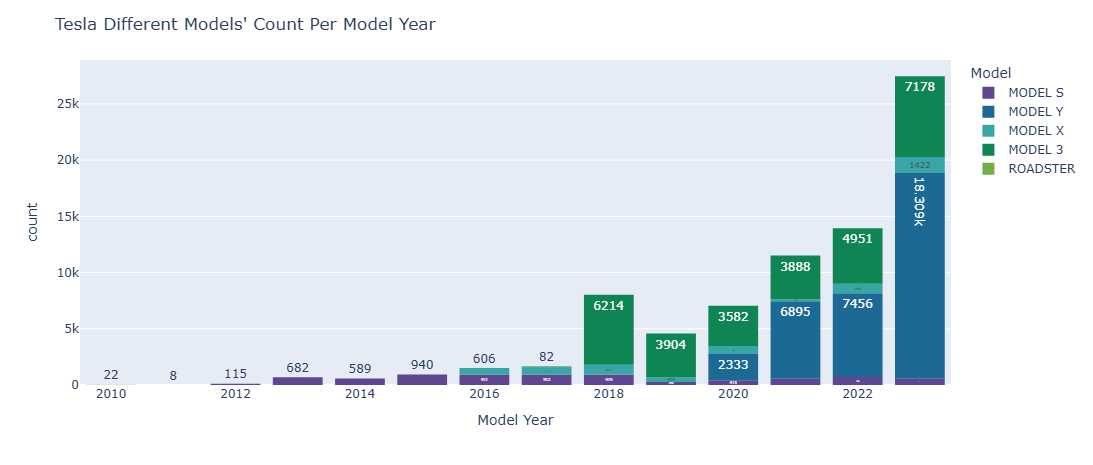

In [83]:
#plot the nuber of tesla cars registered per model year, with each model differentiated
plot = px.histogram(tesla_only_df, x = "Model Year", color = "Model", text_auto=True, color_discrete_sequence=px.colors.qualitative.Prism)
plot.update_layout(bargap=0.2,width=1100, height=450, title = "Tesla Different Models' Count Per Model Year")
plot.show()

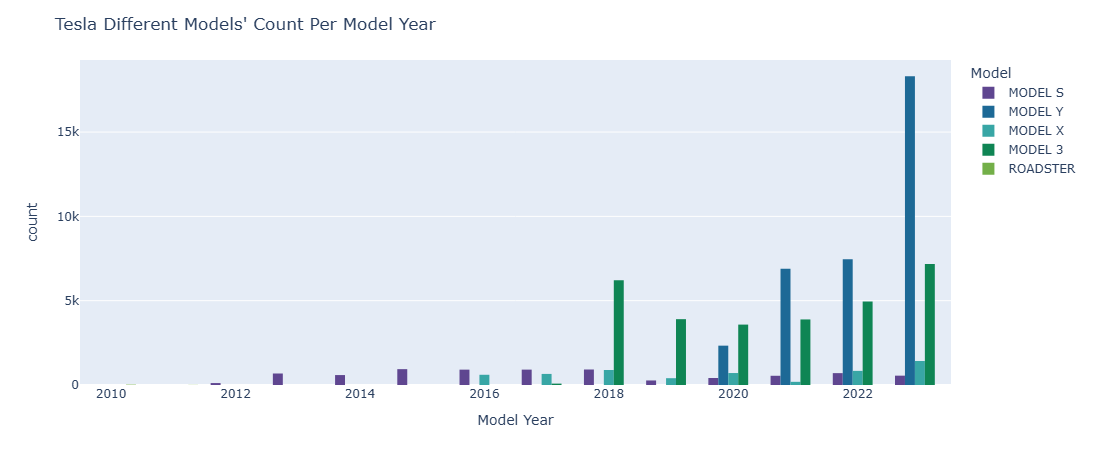

In [84]:
#same plot but showing each model as seperate bars
plot = px.histogram(tesla_only_df, x = "Model Year", color = "Model", color_discrete_sequence=px.colors.qualitative.Prism, barmode="group")
plot.update_layout(bargap=0.2,width=1100, height=450, title = "Tesla Different Models' Count Per Model Year")
plot.show()

In [85]:
#scatter chart to compare the electric range of different models (only valid until 2020). 
#This graph shows highest possible range for each model
fig = px.scatter(tesla_only_df, y = "Electric Range" , x="Model Year", color="Model", color_discrete_sequence=px.colors.qualitative.Prism)
fig.update_traces(marker_size=10)
fig.update_layout(scattermode="group", title = "Tesla Models' Electric Range Per Model Year")
fig.show()

In [86]:
#Checking to see if Tesla has CAFV Eligibility. Information not recorded after 2020, but the rest are eligible
plot = px.histogram(tesla_only_df, x = "Model Year", color = "Clean Alternative Fuel Vehicle (CAFV) Eligibility", text_auto=True, color_discrete_sequence=px.colors.qualitative.Pastel)
plot.update_layout(bargap=0.2,width=1100, height=450, title = "Tesla CAFV Eligibility")
plot.show() 

In [87]:
#looking at base MSRP from Tesla. No information after 2014, so this may not be useful
plot = px.histogram(tesla_only_df, x = "Model Year", color = "Base MSRP", text_auto=True, color_discrete_sequence=px.colors.qualitative.Pastel)
plot.update_layout(bargap=0.2,width=1100, height=450, title = "Tesla Base MSRP")
plot.show() 

In [88]:
#plotting to see what type of EV Tesla produces. So it is all BEV.
plot = px.histogram(tesla_only_df, x = "Model Year", color = "Electric Vehicle Type", text_auto=True, color_discrete_sequence=px.colors.qualitative.Pastel)
plot.update_layout(bargap=0.2,width=1000, height=450, title = "Tesla EV Types")
plot.show()

In [89]:
#looking at the number of BEV compared to PHEV. BEV significantly outweighs PHEV since 2018
plot = px.histogram(cleaned_df, x = "Model Year", color = "Electric Vehicle Type",barmode = "group", text_auto=True, color_discrete_sequence=px.colors.qualitative.Pastel)
plot.update_layout(bargap=0.2,width=1100, height=450, title = "Distribution of EV Types per Model Year")
plot.show()

In [90]:
#plotting number of Tesla cars vs others based on model year. It seems Tesla becomes much more of a market majority since 2018
#This means a lot of BEV on the graph above comes from Tesla
plot = px.histogram(tesla_n_others_df, x = "Model Year", barmode = "group", text_auto=True, color = "Make", color_discrete_sequence=px.colors.qualitative.Safe)
plot.update_layout(bargap=0.2,width=1100, height=450, title = "Distribution of Tesla EV vs Other Brands")
plot.show()

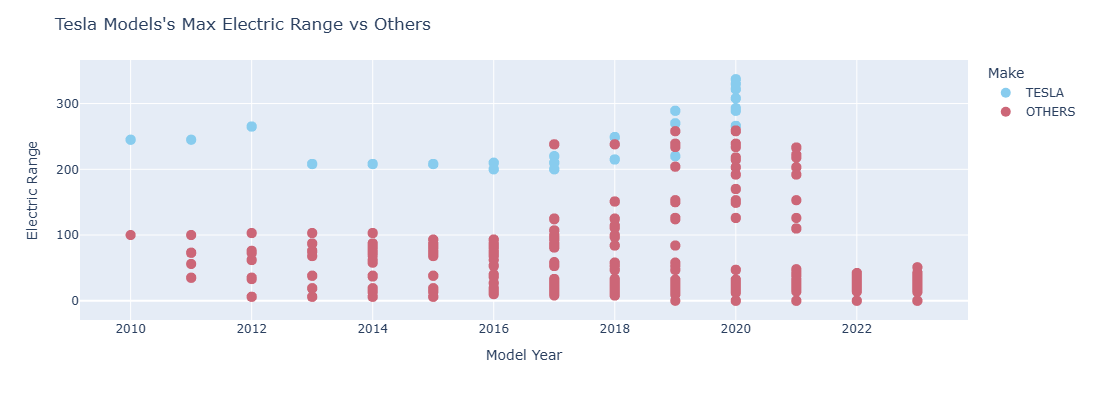

In [101]:
#Comparing Tesla electric range vs other makes. They outperform most competitions, and have more range variety since 2016
fig = px.scatter(tesla_n_others_df, y = "Electric Range" , x="Model Year", color="Make", color_discrete_sequence=px.colors.qualitative.Safe)
fig.update_traces(marker_size=10)
fig.update_layout(scattermode="group",width=1000, height=400, title = "Tesla Models's Max Electric Range vs Others")
fig.show()

In [92]:
#Looking at individual competitions to see who are some notible competitors to Tesla in electric range
fig = px.scatter(cleaned_df, y = "Electric Range" , x="Model Year", color="Make", color_discrete_sequence=px.colors.qualitative.Dark24)
fig.update_traces(marker_size=10)
fig.update_layout(scattermode="group",width=1000, height=400, title = "Tesla Models's Max Electric Range vs Others")
fig.show()